In [0]:
%sh
rm    /tmp/clinicaltrial_2023.zip
rm    /tmp/clinicaltrial_2021.zip
rm    /tmp/clinicaltrial_2020.zip
rm    /tmp/pharma.zip 

rm: cannot remove ' /tmp/pharma.zip': No such file or directory


In [0]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709127125000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706706651000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020/', name='clinicaltrial_2020/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-1.zip', name='clinicaltrial_2020-1.zip', size=10599182, modificationTime=1709545849000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-2.zip', name='clinicaltrial_2020-2.zip', size=10599182, modificationTime=170989271500

In [0]:
# Use this command to copy the files to Local file system 

dbutils.fs.cp("/FileStore/tables/clinicaltrial_2020.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2021.zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/clinicaltrial_2023.zip", "file:/tmp/")

dbutils.fs.cp("/FileStore/tables/pharma.zip", "file:/tmp/")

True

In [0]:
%sh

# use Unix command to to varify that all files are copied to tmp diectory

ls /tmp/

Rserv
RtmpA1xAhC
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2020.zip
clinicaltrial_2021.zip
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-16540d109be14405bedecfcab042092f-systemd-logind.service-3Yd7W6
systemd-private-16540d109be14405bedecfcab042092f-systemd-resolved.service-5SSZwI
tmp.U6kPzF8zki


In [0]:
%sh

# Use Unix command to unzip all files

unzip -d /tmp/ /tmp/clinicaltrial_2020.zip
unzip -d /tmp/ /tmp/clinicaltrial_2021.zip
unzip -d /tmp/ /tmp/clinicaltrial_2023.zip

unzip -d /tmp/ /tmp/pharma.zip

Archive:  /tmp/clinicaltrial_2020.zip
  inflating: /tmp/clinicaltrial_2020.csv  
Archive:  /tmp/clinicaltrial_2021.zip
  inflating: /tmp/clinicaltrial_2021.csv  
Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
# use this command to create DBFS dirctory in file store directory for all files to move back to DBFS

dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2020")
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2021")
dbutils.fs.mkdirs("FileStore/tables/clinicaltrial_2023")

dbutils.fs.mkdirs("FileStore/tables/pharma")

True

In [0]:
# use command to move extracted csv file back to DBFS from tmp directory to fileStore/table directory

dbutils.fs.mv("file:/tmp/clinicaltrial_2020.csv", "FileStore/tables/clinicaltrial_2020.csv", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2021.csv", "FileStore/tables/clinicaltrial_2021.csv", True)
dbutils.fs.mv("file:/tmp/clinicaltrial_2023.csv", "FileStore/tables/clinicaltrial_2023.csv", True)

dbutils.fs.mv("file:/tmp/pharma.csv", "FileStore/tables/pharma.csv", True)

True

In [0]:
# load datasets in dataframe for cleaning 

clinicaltrial_2023_df = spark.read.csv("/FileStore/tables/clinicaltrial_2023.csv", header=True, inferSchema=True)

clinicaltrial_2021_df = spark.read.csv("/FileStore/tables/clinicaltrial_2021.csv", header=True, inferSchema=True)
clinicaltrial_2020_df = spark.read.csv("/FileStore/tables/clinicaltrial_2020.csv", header=True, inferSchema=True)

pharma_df = spark.read.csv("/FileStore/tables/pharma.csv", header="true", inferSchema=True)

In [0]:
clinicaltrial_2023_df.printSchema()

root
 |-- Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = tru

In [0]:



clinicaltrial_2021_df.show(5, truncate=False)

+-------------------------------------------------------------------------------------------------------------------------+
|Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions                                              |
+-------------------------------------------------------------------------------------------------------------------------+
|NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||                           |
|NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder                        |
|NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus||
|NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis                |
|NCT02758860|University of Roma La Sapienza|Active                                                                        |
+-------

In [0]:
clinicaltrial_2020_df.printSchema()
clinicaltrial_2020_df.show(5, truncate=False)

root
 |-- Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions: string (nullable = true)

+-------------------------------------------------------------------------------------------------------------------------+
|Id|Sponsor|Status|Start|Completion|Type|Submission|Conditions|Interventions                                              |
+-------------------------------------------------------------------------------------------------------------------------+
|NCT02758028|The University of Hong Kong|Recruiting|Aug 2005|Nov 2021|Interventional|Apr 2016||                           |
|NCT02751957|Duke University|Completed|Jul 2016|Jul 2020|Interventional|Apr 2016|Autistic Disorder                        |
|NCT02758483|Universidade Federal do Rio de Janeiro|Completed|Mar 2017|Jan 2018|Interventional|Apr 2016|Diabetes Mellitus||
|NCT02759848|Istanbul Medeniyet University|Completed|Jan 2012|Dec 2014|Observational|May 2016|Tuberculosis                |
|NCT02758860|Univer

In [0]:
from pyspark.sql.functions import split, to_date, col

# Splitting columns with headers
clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Id", split(col("Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion"), '\t'))

In [0]:
clinicaltrial_2023_df = clinicaltrial_2023_df.select(
    clinicaltrial_2023_df.Id[0].alias("Id"),
    clinicaltrial_2023_df.Id[1].alias("Study Title"),
    clinicaltrial_2023_df.Id[2].alias("Acronym"),
    clinicaltrial_2023_df.Id[3].alias("Status"),
    clinicaltrial_2023_df.Id[4].alias("Conditions"),
    clinicaltrial_2023_df.Id[5].alias("Interventions"),
    clinicaltrial_2023_df.Id[6].alias("Sponsor"),
    clinicaltrial_2023_df.Id[7].alias("Collaborators"),
    clinicaltrial_2023_df.Id[8].alias("Enrollment"),
    clinicaltrial_2023_df.Id[9].alias("Funder Type"),
    clinicaltrial_2023_df.Id[10].alias("Type"),
    clinicaltrial_2023_df.Id[11].alias("Study Design"),
    clinicaltrial_2023_df.Id[12].alias("Start"),
    clinicaltrial_2023_df.Id[13].alias("Completion")
)

In [0]:
clinicaltrial_2023_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Study Title: string (nullable = true)
 |-- Acronym: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Collaborators: string (nullable = true)
 |-- Enrollment: string (nullable = true)
 |-- Funder Type: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Study Design: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)



In [0]:
pharma_df.printSchema()

root
 |-- Company: string (nullable = true)
 |-- Parent_Company: string (nullable = true)
 |-- Penalty_Amount: string (nullable = true)
 |-- Subtraction_From_Penalty: string (nullable = true)
 |-- Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting: string (nullable = true)
 |-- Penalty_Year: integer (nullable = true)
 |-- Penalty_Date: integer (nullable = true)
 |-- Offense_Group: string (nullable = true)
 |-- Primary_Offense: string (nullable = true)
 |-- Secondary_Offense: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Level_of_Government: string (nullable = true)
 |-- Action_Type: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Civil/Criminal: string (nullable = true)
 |-- Prosecution_Agreement: string (nullable = true)
 |-- Court: string (nullable = true)
 |-- Case_ID: string (nullable = true)
 |-- Private_Litigation_Case_Title: string (nullable = true)
 |-- Lawsuit_Resolution: string (nullable = true)
 |-- Facility_State: string

In [0]:
pharma_df.show(5)

+--------------------+-------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------+--------------------+------------------+---------------------+-----+-------+-----------------------------+------------------+--------------+--------+-------+----+----------+--------------------+--------------------+------------------+-------------------+---------------------------+------------------------+---------------------------+--------------------+--------------------+
|             Company|     Parent_Company|Penalty_Amount|Subtraction_From_Penalty|Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting|Penalty_Year|Penalty_Date|       Offense_Group|     Primary_Offense|   Secondary_Offense|         Description|Level_of_Government|  Action_Type|              Agency|    Civil/Criminal|Prosecution_Ag

In [0]:
# view the first five records of the df_ct2021 dataframe
clinicaltrial_2023_df.show()

+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study Title|  Acronym|    Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion|
+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|NCT03630471|Effectiveness of ...|    PRIDE| COMPLETED|Mental Health Iss...|                NULL|                NULL|                NULL|      NULL|       NULL|          NULL|                NULL|      NULL|      NULL|
|NCT05992571|Oral Ketone Monoe...|         |RECRUITING|Cerebrovascular F...|OTHER: Placebo|DI...| McMaster Universit

In [0]:
from pyspark.sql.functions import col

null_empty_type_count = clinicaltrial_2023_df.filter((col("Type").isNull()) | (col("Type") == "")).count()

null_empty_conditions_count = clinicaltrial_2023_df.filter((col("Conditions").isNull()) | (col("Conditions") == "")).count()

print("Number of null or empty columns in Type column:", null_empty_type_count)
print("Number of null or empty columns in Conditions column:", null_empty_conditions_count)

Number of null or empty columns in Type column: 180380
Number of null or empty columns in Conditions column: 40976


In [0]:
from pyspark.sql.functions import col

null_empty_completion_count = clinicaltrial_2023_df.filter((col("Completion").isNull()) | (col("Completion") == "")).count()

print("Number of null or empty columns in Completion column:", null_empty_completion_count)

Number of null or empty columns in Completion column: 253090


In [0]:
from pyspark.sql.functions import when, col

def calculate_median(df, column):

    filtered_df = df.filter((col(column).isNotNull()) & (col(column) != ""))

    sorted_df = filtered_df.select(column).orderBy(column)
    count = sorted_df.count()
    median_index = count // 2

    if count % 2 == 0:
        median_value = sorted_df.collect()[median_index][0]
    else:
        median_value = sorted_df.collect()[median_index][0]

    return median_value
    
type_median = calculate_median(clinicaltrial_2023_df,"Type")

conditions_median = calculate_median(clinicaltrial_2023_df,"Conditions")

clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Type",
                                                         when((col("Type").isNull()) | (col("Type") == "" ), type_median)
                                                        .otherwise(col("Type")))

clinicaltrial_2023_df = clinicaltrial_2023_df.withColumn("Conditions",
                                                         when((col("Conditions").isNull()) | (col("Conditions") == "" ), conditions_median)
                                                        .otherwise(col("Conditions")))

In [0]:
clinicaltrial_2023_df.show()

+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|         Id|         Study Title|  Acronym|    Status|          Conditions|       Interventions|             Sponsor|       Collaborators|Enrollment|Funder Type|          Type|        Study Design|     Start|Completion|
+-----------+--------------------+---------+----------+--------------------+--------------------+--------------------+--------------------+----------+-----------+--------------+--------------------+----------+----------+
|NCT03630471|Effectiveness of ...|    PRIDE| COMPLETED|Mental Health Iss...|                NULL|                NULL|                NULL|      NULL|       NULL|INTERVENTIONAL|                NULL|      NULL|      NULL|
|NCT05992571|Oral Ketone Monoe...|         |RECRUITING|Cerebrovascular F...|OTHER: Placebo|DI...| McMaster Universit

#   Implimentation of RDD for Clinicaltrial_2023


In [0]:
# Convert DataFrame to RDD

clinicaltrial_2023_rdd = clinicaltrial_2023_df.rdd

In [0]:
# Convert DataFrame to RDD

pharma_rdd = pharma_df.rdd

####  Question No 1

In [0]:
# Map each row in the RDD to the 'Study Title' column value
# This step assumes that each row is a dictionary or namedtuple,
# and the 'Study Title' column can be accessed using the key or attribute name 'Study Title'
study_titles_rdd = clinicaltrial_2023_rdd.map(lambda x: x['Id'])

# Remove duplicate study titles from the RDD
distinct_study_titles_rdd = study_titles_rdd.distinct()

# Count the number of distinct study titles, which represents the number of distinct studies
num_studies_rdd = distinct_study_titles_rdd.count()

# Print the number of distinct studies
print("Number of studies in the dataset:", num_studies_rdd)

Number of studies in the dataset: 483422


####  Question No 2


In [0]:
# Convert DataFrame to RDD
clinicaltrial_rdd = clinicaltrial_2023_df.rdd

# Map each type to a tuple with a count of 1
type_counts_rdd = clinicaltrial_rdd.map(lambda x: (x["Type"], 1))

# Reduce by key to count frequencies of each type
type_frequencies_rdd = type_counts_rdd.reduceByKey(lambda a, b: a + b)

# Sort by frequency in descending order
sorted_type_frequencies_rdd = type_frequencies_rdd.sortBy(lambda x: x[1], ascending=False)

# Collect results
type_frequencies = sorted_type_frequencies_rdd.collect()

# Print the result
print("Types of studies and their frequencies:")
for type, frequency in type_frequencies:
    print(f"Type: {type}, Frequency: {frequency}")

Types of studies and their frequencies:
Type: INTERVENTIONAL, Frequency: 411364
Type: OBSERVATIONAL, Frequency: 71499
Type: EXPANDED_ACCESS, Frequency: 559


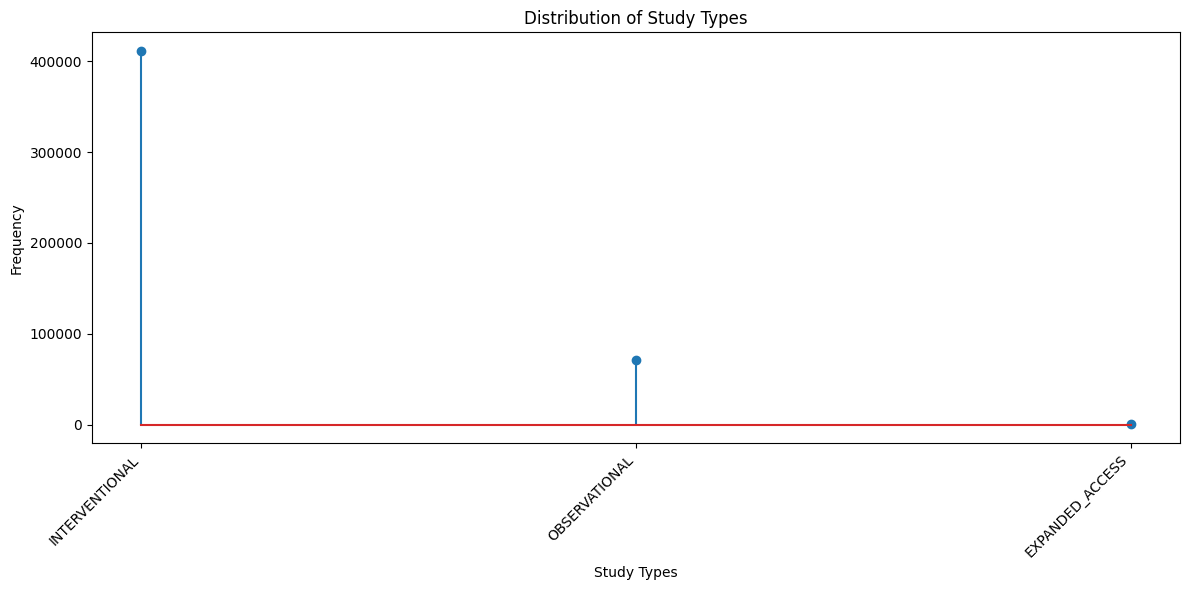

In [0]:
import matplotlib.pyplot as plt

# Extract study types and their counts
types = [t[0] for t in sorted_type_frequencies_rdd.collect()]
counts = [t[1] for t in sorted_type_frequencies_rdd.collect()]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.stem(types, counts)
plt.xlabel('Study Types')
plt.ylabel('Frequency')
plt.title('Distribution of Study Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####  Question No 3

In [0]:
# Map each condition to a tuple with a count of 1
condition_counts_rdd = clinicaltrial_rdd.map(lambda x: (x["Conditions"], 1))

# Reduce by key to count frequencies of each condition
condition_frequencies_rdd = condition_counts_rdd.reduceByKey(lambda a, b: a + b)

# Sort by frequency in descending order
sorted_condition_frequencies_rdd = condition_frequencies_rdd.sortBy(lambda x: x[1], ascending=False)

# Take top 5 conditions
top_5_conditions = sorted_condition_frequencies_rdd.take(5)

# Print the result
print("Top 5 conditions and their frequencies:")
for condition, frequency in top_5_conditions:
    print(f"Condition: {condition}, Frequency: {frequency}")

Top 5 conditions and their frequencies:
Condition: Hypotension|Sepsis, Frequency: 40978
Condition: Healthy, Frequency: 6665
Condition: Breast Cancer, Frequency: 4138
Condition: Diabetes Mellitus, Frequency: 3333
Condition: Pain, Frequency: 2562


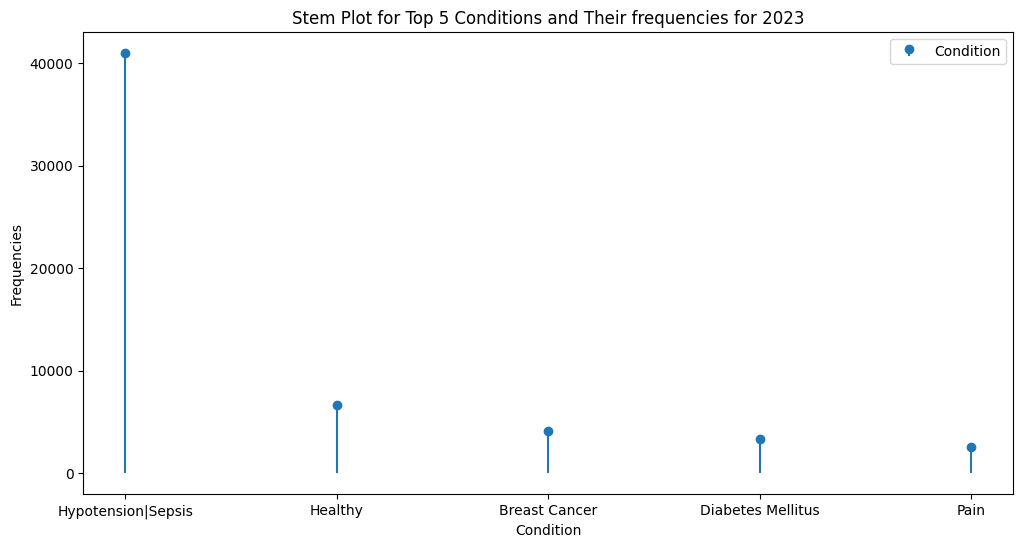

In [0]:
import matplotlib.pyplot as plt

# Set the figure size for the stem plot

plt.figure(figsize=(12, 6))

# Extract the stems and frequencies

stems = [cond[0] for cond in top_5_conditions]
frequencies = [count[1] for count in top_5_conditions]

# Create a stem plot
plt.stem(stems, frequencies, basefmt=' ', markerfmt='o', label='Condition')
plt.title('Stem Plot for Top 5 Conditions and Their frequencies for 2023')
plt.xlabel('Condition')
plt.ylabel('Frequencies')
plt.legend()
plt.show()

#### Question No 4

In [0]:
# Create a rdd file called pharma_rdd
pharma_rdd = pharma_df.rdd

# Process pharma_rdd to extract necessary information
processed_pharma_rdd = pharma_rdd.map(lambda x: x['Parent_Company'])

# Collect the processed data as pharma_data
pharma_data = processed_pharma_rdd.collect()

# Now use pharma_data to filter out pharmaceutical companies from the sponsors list
non_pharma_sponsors_rdd = clinicaltrial_2023_rdd.filter(lambda x: x['Sponsor'] is not None) \
    .filter(lambda x: x['Sponsor'] not in pharma_data) \
    .map(lambda x: (x['Sponsor'], 1)).reduceByKey(lambda x, y: x + y) \
    .sortBy(lambda x: x[1], ascending=False).take(10)

# Print the result
print("Top 10 non-pharmaceutical sponsors:")
for sponsor, num_trials in non_pharma_sponsors_rdd:
    print(sponsor, ":", num_trials)

Top 10 non-pharmaceutical sponsors:
University Hospital : 8363
University of California : 4100
Assiut University : 2913
Cairo University : 2570
Assistance Publique - Hôpitaux de Paris : 2539
Mayo Clinic : 2328
National Cancer Institute (NCI) : 2325
M.D. Anderson Cancer Center : 2181
Massachusetts General Hospital : 1979
National Taiwan University Hospital : 1829


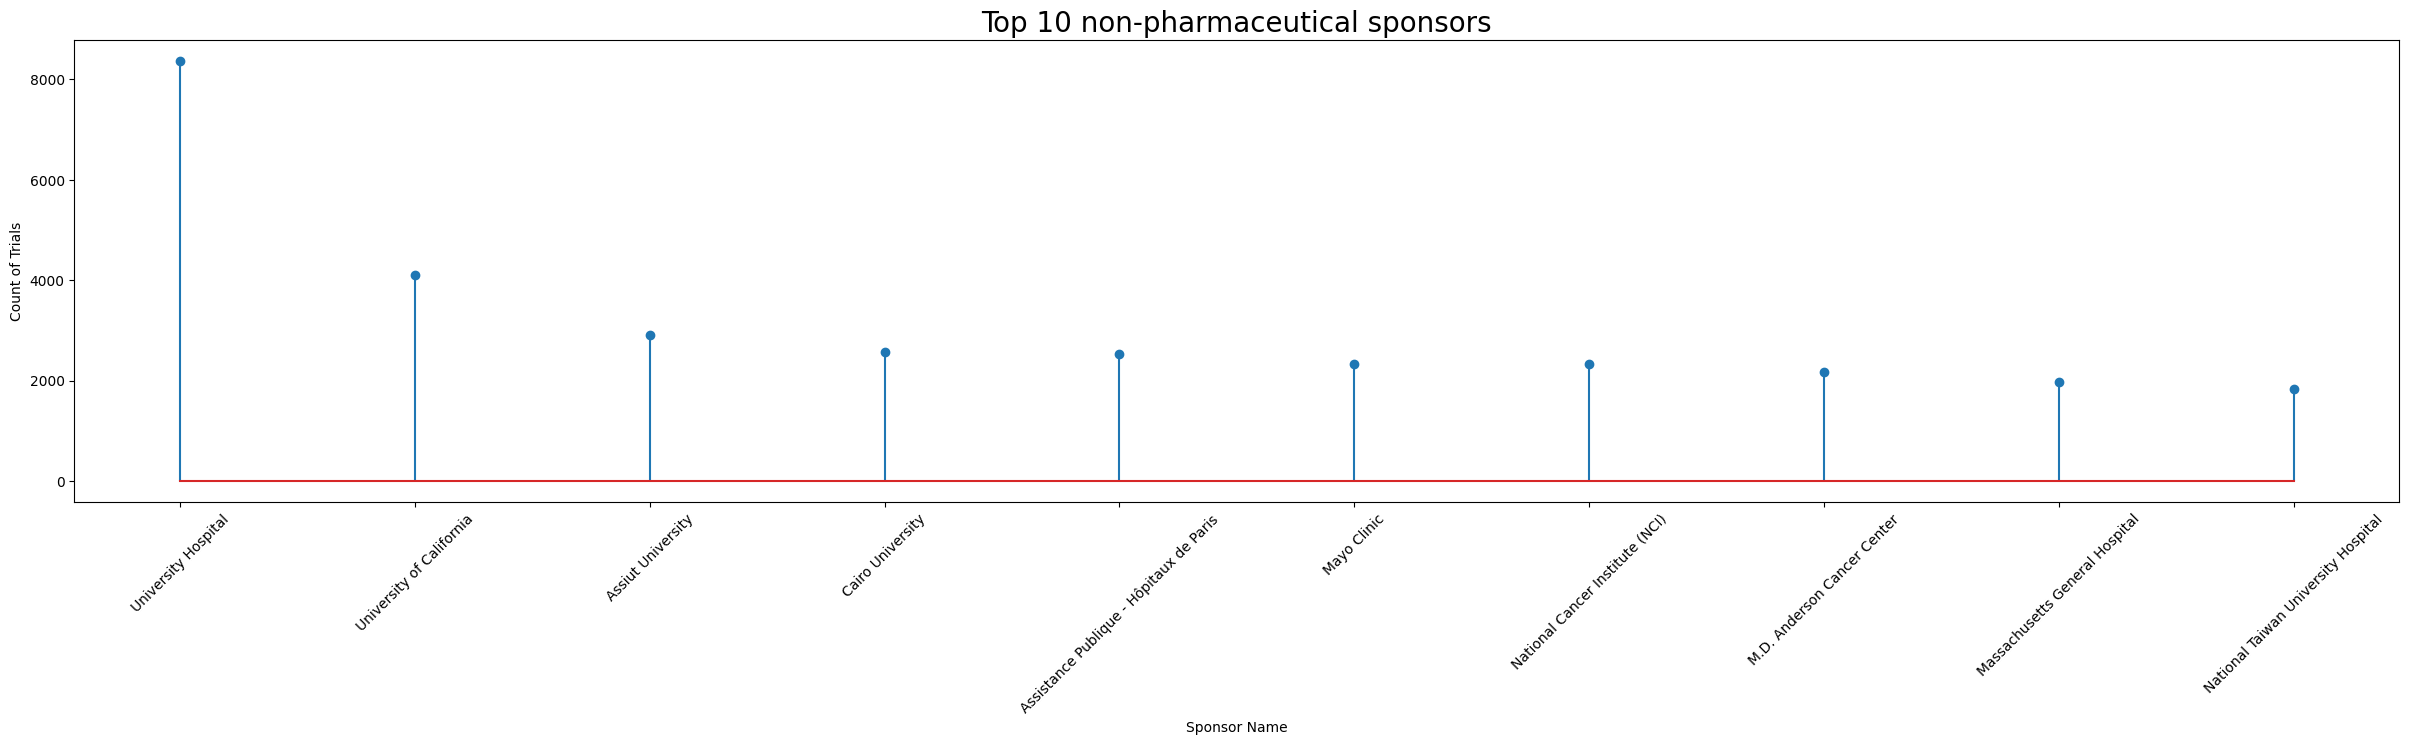

In [0]:
import matplotlib.pyplot as plt


# get the x and y values for the stem plot
x_values = [i[0] for i in non_pharma_sponsors_rdd]
y_values = [i[1] for i in non_pharma_sponsors_rdd]

# create a figure
plt.figure(figsize=(30, 6))

# create a stem plot
plt.stem(x_values, y_values)

# add title, labels and grid
plt.title('Top 10 non-pharmaceutical sponsors', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Sponsor Name')
plt.ylabel('Count of Trials')

# display the plot
plt.show()

#### Question No 5


In [0]:
from pyspark.sql.functions import month
from collections import OrderedDict

# Filter completed studies with valid 'Completion' dates in 2023 and extract the month
completed_studies_rdd = clinicaltrial_2023_rdd.filter(lambda x: x['Completion'] and x['Completion'].startswith('2023-')) \
    .map(lambda x: (x['Completion'].split('-')[1], 1)) \
    .filter(lambda x: x[0].isdigit() and 1 <= int(x[0]) <= 12) \
    .reduceByKey(lambda x, y: x + y) \
    .sortByKey()  # Sort by month

# Collect the results
completed_studies_data = completed_studies_rdd.collect()

# Print the results
for month, num_completed_studies in completed_studies_data:
    print("Month:", month, "Completed Studies:", num_completed_studies)

Month: 01 Completed Studies: 1291
Month: 02 Completed Studies: 1044
Month: 03 Completed Studies: 1469
Month: 04 Completed Studies: 1169
Month: 05 Completed Studies: 1284
Month: 06 Completed Studies: 1787
Month: 07 Completed Studies: 1374
Month: 08 Completed Studies: 1345
Month: 09 Completed Studies: 1432
Month: 10 Completed Studies: 1313
Month: 11 Completed Studies: 1149
Month: 12 Completed Studies: 4659


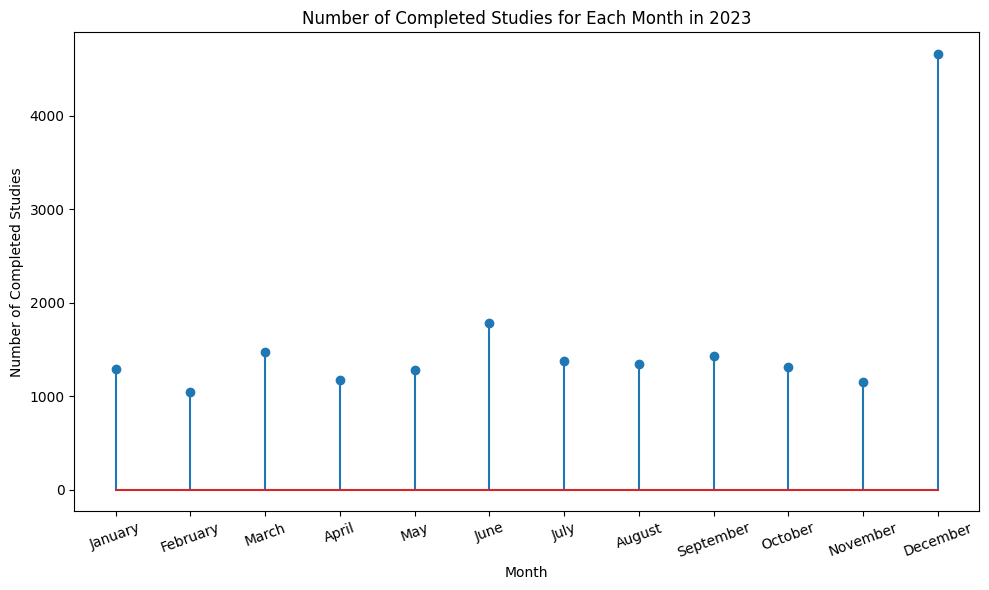

In [0]:
import matplotlib.pyplot as plt
from calendar import month_name

# Extract month names and counts from the collected data
months = [month_name[int(month)] for month, _ in completed_studies_data]
num_completed_studies = [count for _, count in completed_studies_data]

# Plot the data
plt.figure(figsize=(10, 6))
plt.stem(months, num_completed_studies)
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')
plt.title('Number of Completed Studies for Each Month in 2023')
plt.xticks(rotation=20)  
plt.tight_layout()
plt.show()

#  Further Analysis 1 in RDD


In [0]:
pip install prettytable

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
from pyspark.sql.functions import col

from prettytable import PrettyTable

# cread rdd from pharma datafram
penalties_rdd = pharma_df.select("Company", "Penalty_Amount").rdd

# Calculate the total penalties for each company
total_penalties = penalties_rdd.mapValues(lambda x: float(x.replace("$", "").replace(",", ""))).reduceByKey(lambda x, y: x + y)

# Sort the results in decreasing order
sorted_penalties = total_penalties.sortBy(lambda x: x[1], ascending=False)

# Collect the results
results = sorted_penalties.collect()

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Company", "Total Penalties"]

# Add data to the table
for company, total_penalty in results:
    table.add_row([company, total_penalty])

# Print the table
print(table)

+--------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+
|                                                                        Company                                                                         | Total Penalties |
+--------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------+
|                                                                     Purdue Pharma                                                                      |  10313500000.0  |
|                                                                    Purdue Pharma LP                                                                    |   8344000000.0  |
|                                                                   Johnson & Johnson                                                  

/root/.ipykernel/4209/command-2312435446210215-3117344533:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


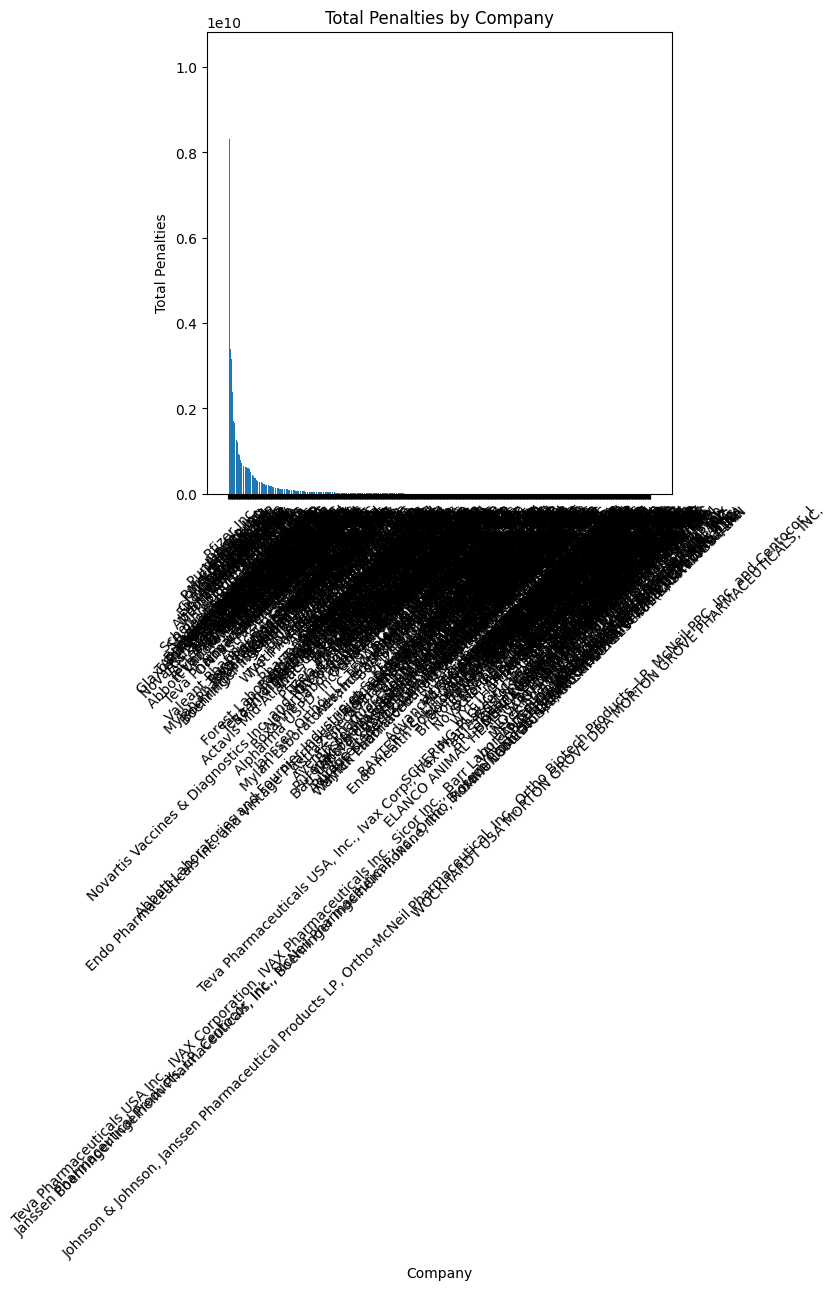

In [0]:
from pyspark.sql.functions import col
from prettytable import PrettyTable
import matplotlib.pyplot as plt

# DataFrame is named "pharma_df"
penalties_rdd = pharma_df.select("Company", "Penalty_Amount").rdd

# Calculate the total penalties for each company
total_penalties = penalties_rdd.mapValues(lambda x: float(x.replace("$", "").replace(",", ""))).reduceByKey(lambda x, y: x + y)

# Sort the results in decreasing order
sorted_penalties = total_penalties.sortBy(lambda x: x[1], ascending=False)

# Collect the results
results = sorted_penalties.collect()

# Create lists for company names and total penalties
companies = []
penalties = []

# Iterate over the results and populate the lists
for company, total_penalty in results:
    companies.append(company)
    penalties.append(total_penalty)

# Create the bar graph
plt.figure(figsize=(6, 6))
plt.bar(companies, penalties)
plt.xticks(rotation=45)
plt.xlabel("Company")
plt.ylabel("Total Penalties")
plt.title("Total Penalties by Company")
plt.tight_layout()
plt.show()

# Further Analysis 2 in Dataframe

In [0]:
from pyspark.sql.functions import sum, col, when, year, desc, to_date
from prettytable import PrettyTable

# DataFrame is named "pharma_df"
company_penalties = pharma_df.groupBy("Company").agg(sum("Penalty_Amount").alias("Total_Penalties"))

# Sort the companies by total penalties in descending order
sorted_companies = company_penalties.orderBy(desc("Total_Penalties"))

# Get the top 10 companies
top_companies = sorted_companies.limit(10)

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Company", "Maximum Penalty Amount", "Year with Maximum Penalty"]

# Add data to the table
for row in top_companies.collect():
    company = row["Company"]
    max_penalty_amount = pharma_df.filter((pharma_df.Company == company)).select("Penalty_Amount").orderBy(desc("Penalty_Amount")).first()[0]
    max_penalty_year = pharma_df.filter((pharma_df.Company == company) & (pharma_df.Penalty_Amount == max_penalty_amount)).select(year(to_date("Penalty_Date", "yyyyMMdd"))).first()[0]
    table.add_row([company, max_penalty_amount, max_penalty_year])

# Print the table
print(table)


+------------------------------------------------------+------------------------+---------------------------+
|                       Company                        | Maximum Penalty Amount | Year with Maximum Penalty |
+------------------------------------------------------+------------------------+---------------------------+
|                 EMD Millipore Corp.                  |        $385,000        |            2017           |
|                     Serono, S.A.                     |      $704,000,000      |            2005           |
|               Schering Plough Products               |        $49,000         |            2002           |
| Actavis Mid-Atlantic, LLC and Actavis Elizabeth, LLC |      $29,230,000       |            2011           |
|          Ortho-McNeil Pharmaceutical, Inc.           |       $3,400,000       |            2009           |
|                  CHIRON CORPORATION                  |        $90,140         |            2000           |
|         

# Further Analysis 3 in SQL

In [0]:
%sql
SELECT 
  `Primary Offense`,
  COUNT(`Primary Offense`) AS Offense_Count
FROM 
  pharma_df
GROUP BY 
  `Primary Offense`
ORDER BY 
  Offense_Count DESC
LIMIT 
  10;


  File <command-1897631578333879>, line 2
    `Primary Offense`,
    ^
IndentationError: unexpected indent


In [0]:
from pyspark.sql.functions import col, count, desc
from prettytable import PrettyTable

# Assuming your DataFrame is named "pharma_df"
offense_counts = pharma_df.groupBy("Primary_Offense").agg(count("Primary_Offense").alias("Offense_Count"))

# Sort the offense counts in descending order
sorted_offenses = offense_counts.orderBy(desc("Offense_Count"))

# Get the top 10 offense types
top_offenses = sorted_offenses.limit(10)

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Primary_Offense", "Offense_Count"]

# Add data to the table
for row in top_offenses.collect():
    offense_type = row["Primary_Offense"]
    offense_count = row["Offense_Count"]
    table.add_row([offense_type, offense_count])

# Print the table
print(table)


+-------------------------------------------------------+---------------+
|                    Primary_Offense                    | Offense_Count |
+-------------------------------------------------------+---------------+
|              False Claims Act and related             |      281      |
|                environmental violation                |      202      |
| off-label or unapproved promotion of medical products |      105      |
|          workplace safety or health violation         |       68      |
|       price-fixing or anti-competitive practices      |       48      |
|       drug or medical equipment safety violation      |       36      |
|                 kickbacks and bribery                 |       28      |
|             consumer protection violation             |       27      |
|               employment discrimination               |       26      |
|                wage and hour violation                |       19      |
+-------------------------------------

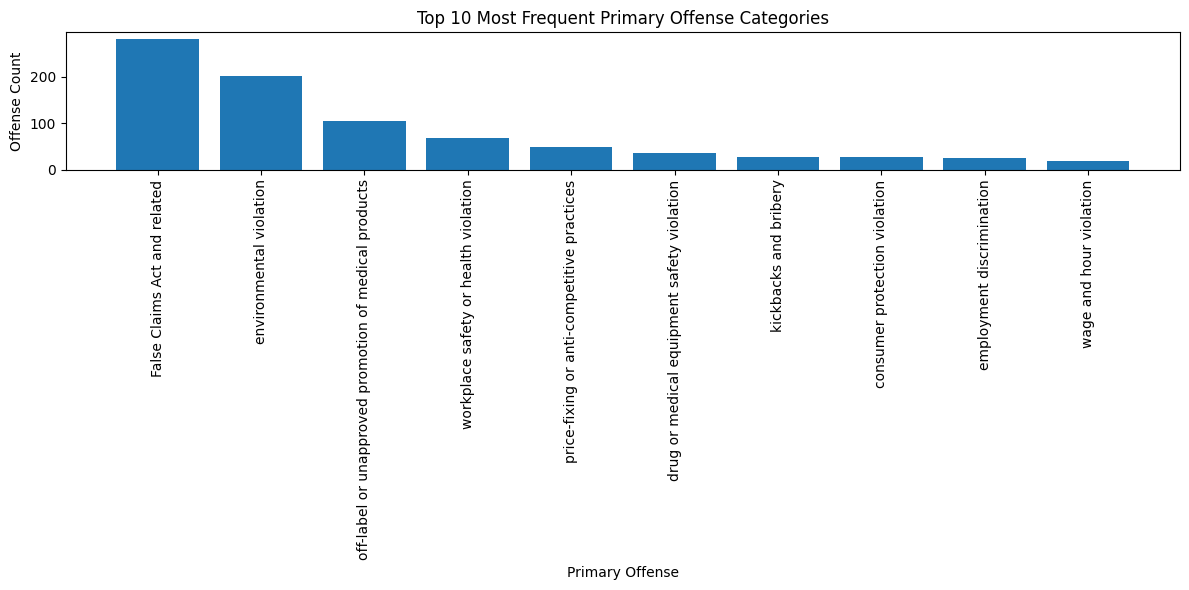

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, count, desc

# Assuming your DataFrame is named "pharma_df"
offense_counts = pharma_df.groupBy("Primary_Offense").agg(count("Primary_Offense").alias("Offense_Count"))

# Sort the offense counts in descending order
sorted_offenses = offense_counts.orderBy(desc("Offense_Count"))

# Get the top 10 offense types
top_offenses = sorted_offenses.limit(10)

# Extract the primary offense types and offense counts
primary_offenses = [row["Primary_Offense"] for row in top_offenses.select("Primary_Offense").collect()]
offense_counts = [row["Offense_Count"] for row in top_offenses.select("Offense_Count").collect()]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(primary_offenses, offense_counts)
plt.xticks(rotation=90)
plt.xlabel("Primary Offense")
plt.ylabel("Offense Count")
plt.title("Top 10 Most Frequent Primary Offense Categories")
plt.tight_layout()
plt.show()


#   Implimentation of RDD for Clinicaltrial_2021 and 2020

In [0]:
clinicaltrial_2021_rdd = clinicaltrial_2021_df.rdd

clinicaltrial_2020_rdd = clinicaltrial_2020_df.rdd

In [0]:
num_studies_rdd_2021 = clinicaltrial_2021_rdd.map(lambda x: x[0]).distinct().count()

print("Number of studies in the dataset 2021:", num_studies_rdd_2021)

Number of studies in the dataset 2021: 387261


In [0]:
num_studies_rdd_2020 = clinicaltrial_2020_rdd.map(lambda x: x[0]).distinct().count()

print("Number of studies in the dataset 2020:", num_studies_rdd_2020)

Number of studies in the dataset 2020: 356466
